# Classification using the K-Nearest Neighbors algorithm to predict whether a customer will purchase a product based on their Age, Estimated Salary, and Gender. 

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
# classification_report for training and test sets
from sklearn.metrics import classification_report


### Importing dataset and X represents the feature matrix, which contains the input data used to make predictions.y represents the target vector or output variable, which contains the values we want to predict.

In [2]:
dataset = pd.read_csv('C:/Users/hp/Downloads/Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values



### Exploratory Data Analysis

In [3]:
print(dataset.head())       # Display the first few rows of the dataset



    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
print(dataset.info())       # Get general information about the dataset, such as data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [5]:
print(dataset.describe())   # Statistical summary of the dataset

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


### Visualizing the distribution of the target variable (y)

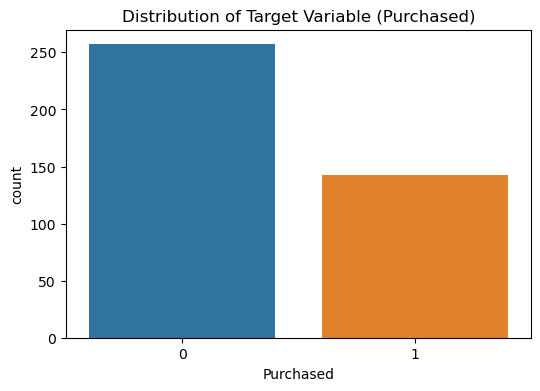

In [6]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=dataset)
plt.title('Distribution of Target Variable (Purchased)')
plt.show()




### Visualizing the correlation between features


plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



### Visualizing the distribution of Age and EstimatedSalary features

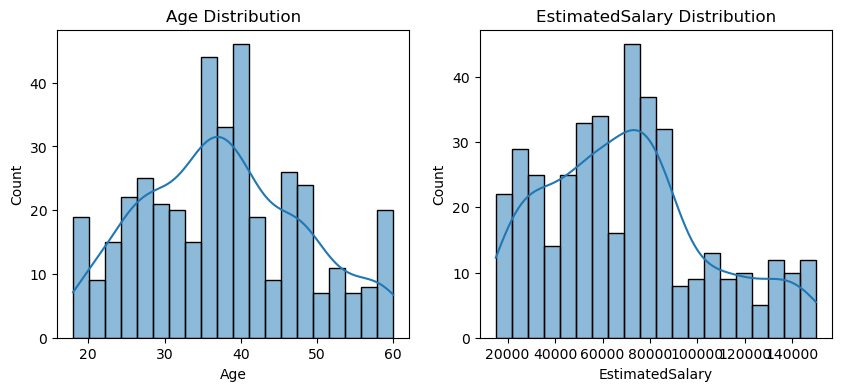

In [7]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=dataset, x='Age', kde=True, bins=20)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(data=dataset, x='EstimatedSalary', kde=True, bins=20)
plt.title('EstimatedSalary Distribution')
plt.show()


### Visualizing the relationship between Age, EstimatedSalary, and Purchased

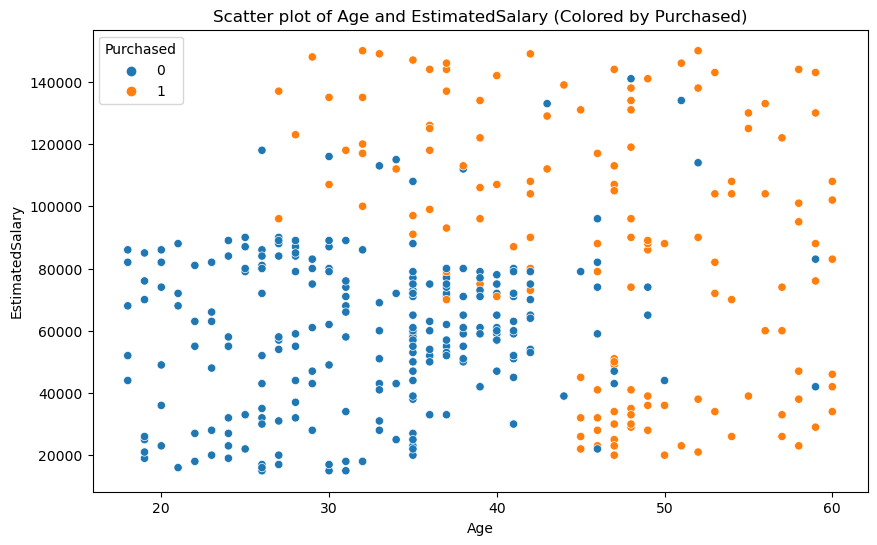

In [8]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', hue='Purchased')
plt.title('Scatter plot of Age and EstimatedSalary (Colored by Purchased)')
plt.show()

### Data Preprocessing steps to prepare the data for training and evaluating a machine learning model

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 ### Using the K-Nearest Neighbors (KNN) algorithm to build a classifier for the given dataset:

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric ='minkowski',p=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_train=classifier.predict(X_train)
y_pred_test=classifier.predict(X_test)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

accuracy score: 0.95


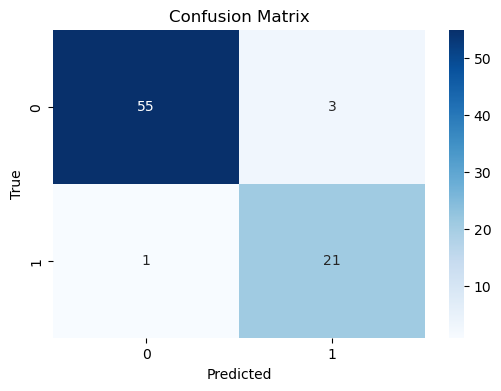

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_squared_error,mean_absolute_error
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print("accuracy score:",ac)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Model Performance Metrics

In [12]:
# Calculate r-squared score, mean squared error, root mean squared error, and mean absolute error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)


# Calculate scores for training and test data
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)


# classification report for training set
print("classification_report for training set:")
print(classification_report(y_train, y_pred_train))

# classification report for test set
print("classification_report for test set:")
print(classification_report(y_test, y_pred_test))


classification_report for training set:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       199
           1       0.87      0.90      0.88       121

    accuracy                           0.91       320
   macro avg       0.90      0.91      0.90       320
weighted avg       0.91      0.91      0.91       320

classification_report for test set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

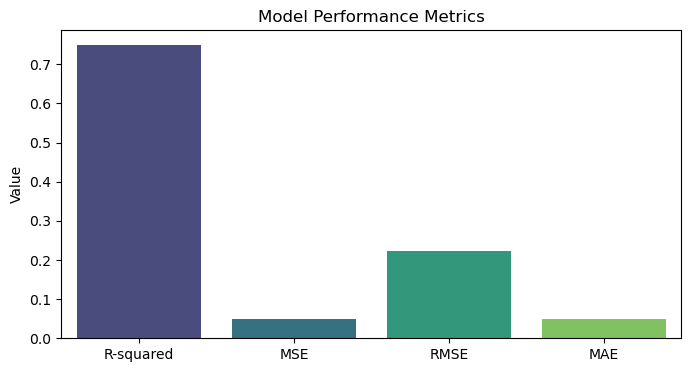

In [13]:
# Create a bar plot for the performance metrics
metrics = ['R-squared', 'MSE', 'RMSE', 'MAE']
values = [r2, mse, rmse, mae]
plt.figure(figsize=(8, 4))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.show()


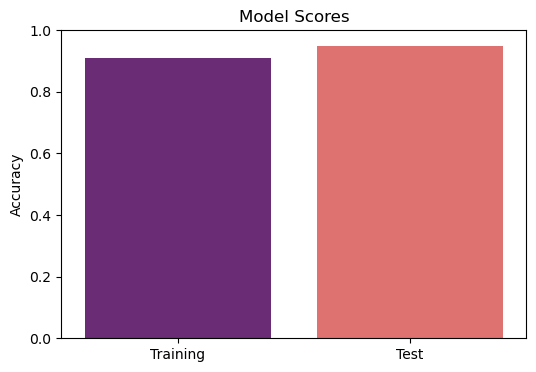

In [14]:
#plot model scores for training and test data
plt.figure(figsize=(6, 4))
sns.barplot(x=['Training', 'Test'], y=[train_score, test_score], palette='magma')
plt.title('Model Scores')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()